<a href="https://colab.research.google.com/github/ggonz105/MAT-421/blob/main/Module_B_17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 17.4 Lagrange Polynomial Interpolation**

The lagrange polynomial is used to find a single specific polynomial, which is referred to as a lagrange polynomial, that will intersect all the data points.

The lagrange polynomial, L($x_{i}$), will then satisfy the property L($x_{i}$) = $y_{i}$ for every data point in the set.

In [13]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

from scipy.interpolate import lagrange

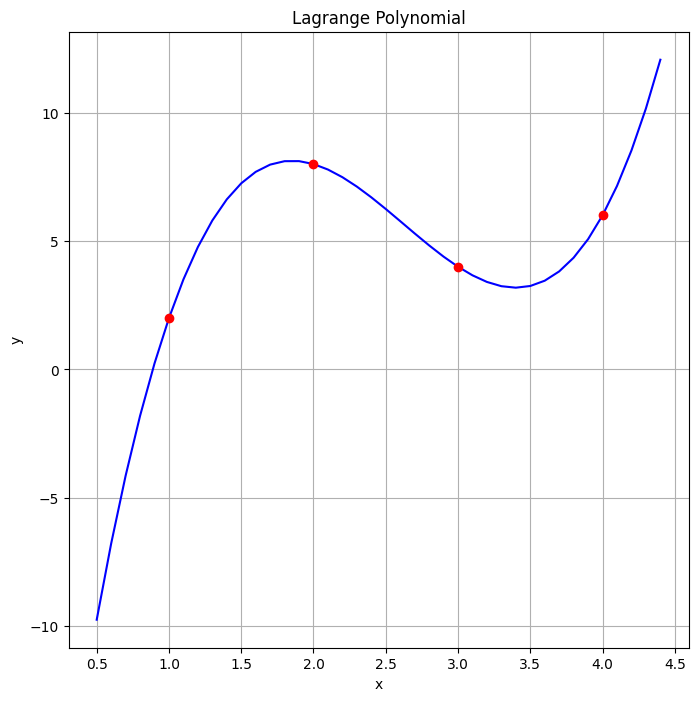

In [14]:
x = [1, 2, 3, 4]
y = [2, 8, 4, 6]

x_new = np.arange(0.5, 4.5, 0.1)

f = lagrange(x, y) # We can use the lagrange function from scipy to get our lagrange polynomial for our data set
fig = plt.figure(figsize = (8,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Section 17.5 Newton's Polynomial Interpolation**

Newton's polynomial interpolation is another form of interpolation that gives an exact fit to any given data set.

The general form of this interpolation is:
f(x) = $a_{0}$ + $a_{1}$(x - $x_{0}$) + $a_{2}$(x - $x_{0}$)(x - $x_{1}$) + ... $a_{n}$(x - $x_{0}$)(x - $x_{1}$)...(x - $x_{n}$)

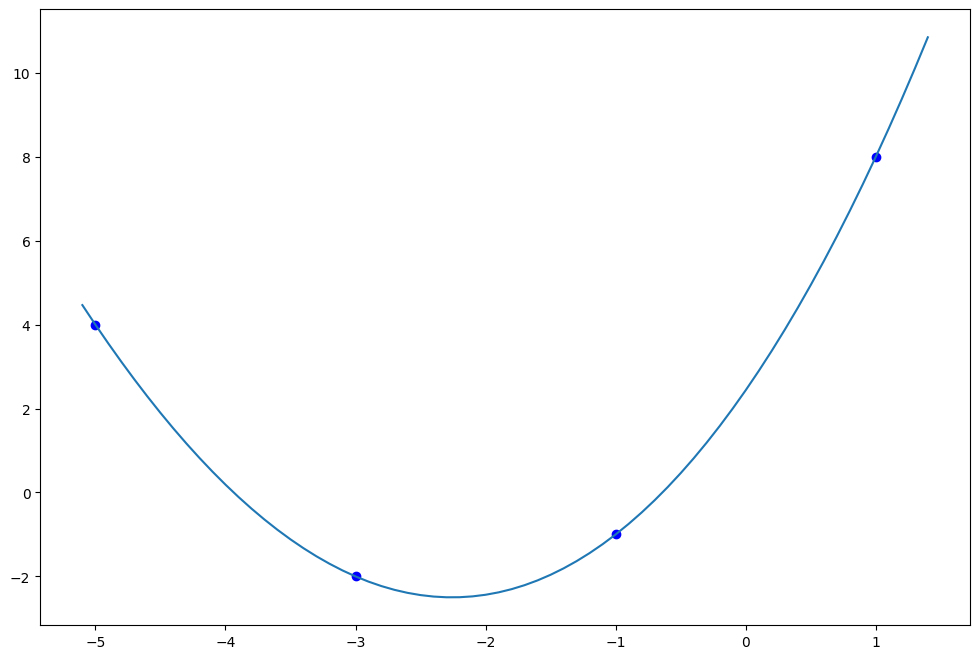

In [15]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -3, -1, 1])
y = np.array([4, -2, -1, 8])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5.1, 1.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)